## Tic-Tac-Toe Agent
​## Objective 

In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#copying file to drive
!cp /content/drive/MyDrive/TCGame_Env.py .

In [3]:
# Importing necessary libraries
import TCGame_Env
from TCGame_Env import TicTacToe 
#- import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [4]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [5]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [6]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [7]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon-min_epsilon)*np.exp(-decayrate*time)
    z = np.random.random()
    
        
    if z > epsilon:
        state1 = Q_state(state)    
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_action = [i for i in env.action_space(state)[0]]
        action = possible_action[np.random.choice(range(len(possible_action)))]   #Exploration: randomly choosing and action
    return action


#### Tracking the state-action pairs for checking convergence - write your code here

In [8]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

In [9]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [('x-1-x-3-x-2-x-x-4',(2,9)),('2-x-1-x-6-x-x-x-9',(6,5)),('x-x-x-3-x-6-7-x-2',(1,1)),('x-x-5-x-8-9-x-x-4',(0,3)),('x-x-x-x-x-x-7-x-2',(1,9)),('x-x-x-x-x-x-x-x-x',(3,7)),('x-x-x-x-x-x-x-x-x',(7,3)),('3-x-6-x-4-x-x-x-7',(6,5)),('x-8-x-x-6-x-x-x-x',(7,1))]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []    #this is an array which will have appended values of that state-action pair for every 2000th episode           
  
  
  

In [10]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [11]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [12]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [13]:
#EPISODES = 20
EPISODES = 5000000 #total no. of episodes
LR = 0.2 #learning rate
GAMMA = 0.91 #Discount factor
max_epsilon= 1.0 #Max so greed : 100%
min_epsilon = 0.001 #greed : .1%
decayrate = 0.001
threshold = 20000 #number of episodes after whihc states_tracked will be saved
policy_threshold = 30000 #number of episodes after whihc Q_dict will be saved

### Q-update loop ---write your code here

In [14]:
import copy
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    env = TicTacToe()
    curr_state = copy.deepcopy(env.state)   
    add_to_dict(curr_state)
    done = False
    while done != True:
        curr_q_state = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state,episode)
        next_state, reward, done = env.step(copy.deepcopy(curr_state),curr_action)
        next_q_state = Q_state(next_state)
        add_to_dict(next_state)
        
       

        if done != True:
          max_next = max(Q_dict[next_q_state],key=Q_dict[next_q_state].get)
          Q_dict[curr_q_state][curr_action] += LR * ((reward + ( GAMMA * (Q_dict[next_q_state][max_next]))) - Q_dict[curr_q_state][curr_action])
        else:
          Q_dict[curr_q_state][curr_action] += \
          LR * (reward - Q_dict[curr_q_state][curr_action])

        curr_state = copy.deepcopy(next_state)
      
    if ((episode+1) % threshold) == 0:
        save_tracking_states()
   
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')
print('Total time taken : ',elapsed_time)
print(episode)

Total time taken :  3327.721106529236
4999999


#### Check the Q-dictionary

In [15]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -0.6351144302045457,
              (0, 3): -0.9258980191138632,
              (0, 5): -0.7513513744255836,
              (0, 7): -0.4115735245517029,
              (0, 9): -0.6264840819470142,
              (1, 1): -0.7844577489055671,
              (1, 3): -0.8783081893410166,
              (1, 5): -0.48939375882430325,
              (1, 7): -1.0280460335594355,
              (1, 9): -0.9142035448446594,
              (2, 1): -1.0165007903943135,
              (2, 3): -1.0873853225663743,
              (2, 5): 5.815903359970241,
              (2, 7): -0.8351475724271362,
              (2, 9): -0.9695229587031958,
              (3, 1): -0.713145772730113,
              (3, 3): -0.5070653337812767,
              (3, 5): -1.114976259495338,
              (3, 7): -0.926132095560751,
              (3, 9): -1.0693528424653294,
              (4, 1): -0.9323978954538323,
              (4, 3): -0.7880235701058265,
              (4, 5

In [16]:
len(Q_dict)

167620

In [17]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

In [18]:
Q_dict[('x-x-x-x-x-x-4-x-5')]

{(0, 1): -0.2,
 (0, 3): -0.2,
 (0, 7): -0.2,
 (0, 9): -0.2,
 (1, 1): -0.016960000000000086,
 (1, 3): -0.2,
 (1, 7): -0.2,
 (1, 9): -0.2,
 (2, 1): -0.2,
 (2, 3): -0.2,
 (2, 7): -0.2,
 (2, 9): -0.2,
 (3, 1): -0.2,
 (3, 3): -0.2,
 (3, 7): -0.2,
 (3, 9): -0.2,
 (4, 1): -0.2,
 (4, 3): -0.016960000000000086,
 (4, 7): -0.10116065280000006,
 (4, 9): -0.2,
 (5, 1): -0.2,
 (5, 3): 0,
 (5, 7): 0,
 (5, 9): 0,
 (7, 1): 0,
 (7, 3): 0,
 (7, 7): 0,
 (7, 9): 0}

In [19]:
Q_dict[('x-x-x-x-x-x-4-x-5')][(0,9)]


-0.2

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [20]:
# Write the code for plotting the graphs for state-action pairs tracked

In [21]:
with open('States_tracked.pkl','rb') as handle:
    States_track = pickle.load(handle)

In [39]:
States_track['x-1-x-3-x-2-x-x-4'][(2,9)]
#),,('x-x-x-3-x-6-7-x-2',(1,1)),('x-x-5-x-8-9-x-x-4',(0,3)),('x-x-x-x-x-x-7-x-2',(1,9)),('3-x-6-x-4-x-x-x-7',(6,5)),('x-8-x-x-6-x-x-x-x',(7,1))]    #select any 4 Q-values

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [23]:
States_track['x-x-x-x-x-x-x-x-x'][(7,3)]

[-1.0299810277262482,
 -1.0582747120006786,
 -0.9996513035088804,
 -0.9996513035088804,
 -1.0361210428071044,
 -1.0319835542456834,
 -1.0319835542456834,
 -1.0255868433965467,
 -1.0204694747172374,
 -1.0527755797737899,
 -1.0527755797737899,
 -1.0701763710552257,
 -1.0561410968441804,
 -1.0561410968441804,
 -1.0561410968441804,
 -1.0561410968441804,
 -1.0449128774753444,
 -1.0359303019802755,
 -1.0359303019802755,
 -1.0359303019802755,
 -1.0651442415842203,
 -1.0651442415842203,
 -1.0651442415842203,
 -1.078092314613901,
 -1.078092314613901,
 -1.078092314613901,
 -1.0988738516911207,
 -1.0988738516911207,
 -1.0988738516911207,
 -1.0988738516911207,
 -1.0988738516911207,
 -1.002102770977701,
 -0.7572878653230836,
 -0.6167145778641283,
 -0.6167145778641283,
 -0.6933716622913026,
 -0.7611386738330421,
 -0.7611386738330421,
 -0.4740309390664337,
 -0.4740309390664337,
 -0.4740309390664337,
 -0.4740309390664337,
 -0.4740309390664337,
 -0.5540277029529905,
 -0.5540277029529905,
 -0.5540277029

In [24]:
States_track['x-x-x-x-x-x-x-x-x'][(3,7)]

[-1.0221850003280784,
 -1.0558460371641458,
 -1.1029569470014795,
 -1.1029569470014795,
 -1.1029569470014795,
 -1.1029569470014795,
 -1.1029569470014795,
 -1.1029569470014795,
 -1.1074623384011837,
 -1.1223698707209468,
 -1.1223698707209468,
 -1.1223698707209468,
 -1.1223698707209468,
 -1.1342958965767576,
 -1.1342958965767576,
 -1.1342958965767576,
 -1.1342958965767576,
 -1.1438367172614061,
 -1.1438367172614061,
 -1.1438367172614061,
 -1.1438367172614061,
 -1.1150693738091249,
 -1.1284554990473,
 -1.1284554990473,
 -1.1284554990473,
 -1.1284554990473,
 -1.1284554990473,
 -1.1284554990473,
 -1.1284554990473,
 -1.1284554990473,
 -1.1284554990473,
 -1.037254143799872,
 -1.0935920973004274,
 -1.0935920973004274,
 -1.0935920973004274,
 -1.0935920973004274,
 -1.0935920973004274,
 -1.1112736778403418,
 -1.1112736778403418,
 -1.1254189422722733,
 -1.1254189422722733,
 -0.9304290430448163,
 -0.9443432344358531,
 -0.9443432344358531,
 -0.9443432344358531,
 -0.9554745875486825,
 -0.955474587548

In [28]:
States_track['x-x-x-x-x-x-7-x-2'][(1,9)]

[0,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -

In [29]:
States_track['2-x-1-x-6-x-x-x-9'][(6,5)]

[]

In [30]:
States_track['x-x-5-x-8-9-x-x-4'][(0,3)]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

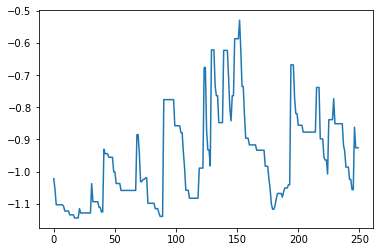

In [38]:
xa= np.arange(len(States_track['x-x-x-x-x-x-x-x-x'][(3,7)]))
plt.plot(xa,np.array(States_track['x-x-x-x-x-x-x-x-x'][(3,7)]))
plt.show()

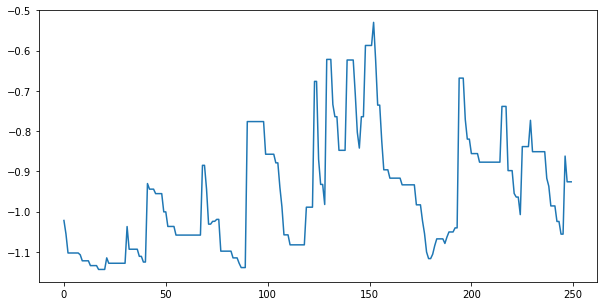

In [33]:
xa= States_track['x-x-x-x-x-x-x-x-x'][(3,7)]
plt.figure(0, figsize=(10,5))
plt.plot(np.asarray(range(0,len(xa))),np.asarray(xa))
plt.show()

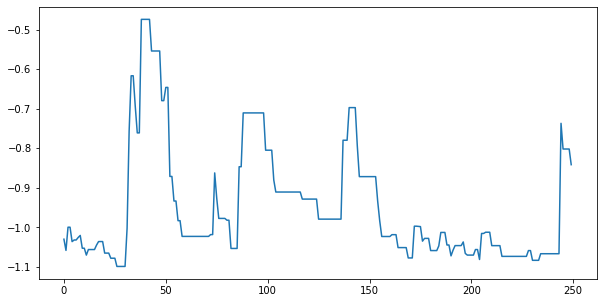

In [34]:
xa= States_track['x-x-x-x-x-x-x-x-x'][(7,3)]
plt.figure(0, figsize=(10,5))
plt.plot(np.asarray(range(0,len(xa))),np.asarray(xa))
plt.show()

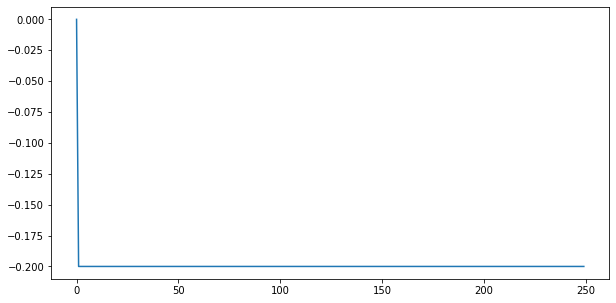

In [35]:
xa= States_track['x-x-x-x-x-x-7-x-2'][(1,9)]
plt.figure(0, figsize=(10,5))
plt.plot(np.asarray(range(0,len(xa))),np.asarray(xa))
plt.show()

### Epsilon - decay check

In [44]:
max_epsilon = 1.00
min_epsilon = 0.001
time = np.arange(0,500000)
epsilon = []
for i in range(0,500000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

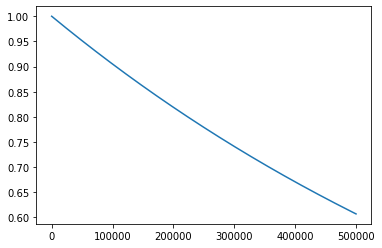

In [45]:
plt.plot(time, epsilon)
plt.show()